In [33]:
import pandas as pd
import numpy as numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle


In [34]:
  data = pd.read_csv('/content/Churn_Modelling.csv')

In [35]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
##preprocess the data
##drop irrelevant column
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [37]:
#encode categorical variable
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [38]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [39]:
#use geography one hot encoder
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
geo_encoder = onehot_encoder.fit_transform(data[['Geography']])

In [40]:
onehot_encoder.get_feature_names_out(["Geography"])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [41]:
geo_df = pd.DataFrame(geo_encoder.toarray(),columns=onehot_encoder.get_feature_names_out(["Geography"]))

In [42]:
#combine ge_df with original data
data = pd.concat([data.drop('Geography',axis=1),geo_df],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [43]:
#save the files in pickle files
#save encoder and scaler
with open('label_encoder.pkl','wb') as le_file:
    pickle.dump(label_encoder,le_file)
with open('onehot_encoder.pkl','wb') as oe_file:
    pickle.dump(onehot_encoder,oe_file)




In [44]:
##divide data into independent and dependent features
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [45]:
X=data.drop("Exited",axis=1)
y=data["Exited"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
with open('scaler.pkl','wb') as scaler_file:
    pickle.dump(scaler,scaler_file)

In [48]:
#ann implementation


In [49]:
!pip install tensorflow

In [50]:
import tensorflow as tf

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [52]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), #first hidden layer connected with input layer 64 neurons
    Dense(32,activation='relu'), #hl 2
    Dense(1,activation='sigmoid') #output layer

])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
##compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [66]:
#set up TensorBoard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [67]:
 #setup early stopping when accuracy does not improve we use it
 early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [68]:
#training the model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,validation_split=0.2,callbacks=[tensorflow_callback,early_stopping])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8672 - loss: 0.3225 - val_accuracy: 0.8605 - val_loss: 0.3430
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8676 - loss: 0.3211 - val_accuracy: 0.8610 - val_loss: 0.3415
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8619 - loss: 0.3207 - val_accuracy: 0.8605 - val_loss: 0.3420
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8610 - loss: 0.3250 - val_accuracy: 0.8585 - val_loss: 0.3394
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8673 - loss: 0.3263 - val_accuracy: 0.8630 - val_loss: 0.3396
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8729 - loss: 0.3064 - val_accuracy: 0.8605 - val_loss: 0.3385
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8704 - loss: 0.3085 - val_accuracy: 0.8585 - val_loss: 0.3415
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8749 - loss: 0.3034 - val_accu

In [69]:
model.save('churn_prediction_model.h5')
#load tensor board extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [70]:
%tensorboard --log_dir logs/fit

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2025-03-27 07:48:16.032485: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743061696.059663   16044 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743061696.067146   16044 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Error: A logdir or db must be specified. For example `tensorboard --logdir mylogdir` or `tensorboard --db sqlite:~/.tensorboard.db`. Run `tensorboard --helpfull` for details and examples.

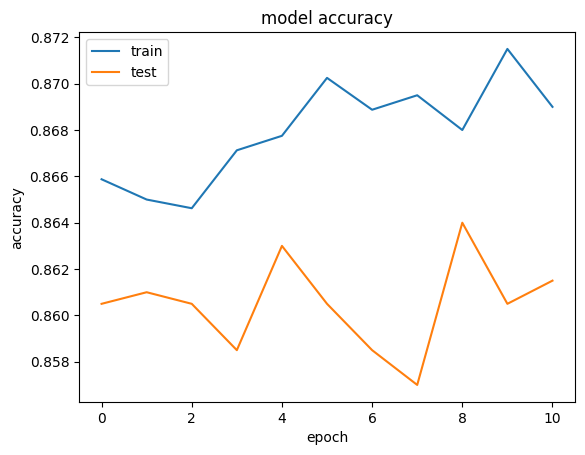

In [73]:
#summarize the data
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [80]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm
accuracy_score(y_test,y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.8605

In [81]:
from tensorflow.keras.models import load_model

In [82]:
#load pickle file
model = load_model('churn_prediction_model.h5')
with open('label_encoder.pkl','rb') as le_file:
    label_encoder = pickle.load(le_file)
with open('onehot_encoder.pkl','rb') as oe_file:
    onehot_encoder = pickle.load(oe_file)
with open("scaler.pkl",'rb') as sc_file:
    scaler = pickle.load(sc_file)

In [84]:
#enter input data
input_data = {
    'CreditScore': 600,
    'Geography': 'France',
    'Gender': 'Male',
    'Age': 40,
    'Tenure': 3,
    'Balance': 60000,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember':1,
    "EstimatedSalary": 50000
}

In [87]:
input_df = pd.DataFrame([input_data])
input_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,600,France,Male,40,3,60000,2,1,1,50000


In [88]:
input_df["Gender"]= label_encoder.transform(input_df['Gender'])

In [89]:
input_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,600,France,1,40,3,60000,2,1,1,50000
